In [1]:
# CoppeliaSim Pick-and-Place Software 

# imports
import math
import numpy as np
from numpy import linalg as LA
import modern_robotics as mr
import matplotlib.pyplot as plt

# trajectory generator for desired configurations 
def TrajectoryGenerator(eeInit, cubeInit, cubeFinal, grasp, standoff, k=1):
    """
    eeInit: The initial configuration of the end-effector in the reference trajectory: Tse,i
    cubeInit: The cube's initial configuration: Tsc,i
    cubeFinal: The cube's desired final configuration: Tsc,f
    grasp: The end-effector's configuration relative to the cube when it is grasping the cube: Tce,g
    standoff: The end-effector's standoff height above the cube, before and after grasping, relative to the cube
    k: 1
    """

    # constants
    dt = 0.01 #seconds
    gripT = 0.63 #seconds
    method = 5
    tf = 3
    steps = tf*k / dt

    # gripper states: 
    openG = 0
    closedG = 1

    # transformation matrices 
    standoffInit = np.matmul(cubeInit, standoff) # Tsc,i * Tce,s = Tse, init standoff
    graspInit = np.matmul(cubeInit, grasp) # Tsc,i * Tce,g = Tse, init grasp
    standoffFinal = np.matmul(cubeFinal, standoff) # Tsc,f * Tce,s = Tse, final standoff
    graspFinal = np.matmul(cubeFinal, grasp) # Tsc,f * Tce,g = Tse, final grasp

    # trajectories
    traj = []
    # step 1: eeInit > eeStandoff 
    step1 = mr.ScrewTrajectory(eeInit, standoffInit, tf, steps, method)
    g1 = openG
    for i in range(len(step1)):
        traj1 = [step1[i][0][0], step1[i][0][1], step1[i][0][2], step1[i][1][0], step1[i][1][1], step1[i][1][2], step1[i][2][0], step1[i][2][1], step1[i][2][2], step1[i][0][3], step1[i][1][3], step1[i][2][3], g1]
        traj.append((traj1))
    # step 2: eestandoff > grasp
    step2 = mr.ScrewTrajectory(standoffInit, graspInit, tf, steps, method)
    g2 = openG
    for i in range(len(step2)):
        traj2 = [step2[i][0][0], step2[i][0][1], step2[i][0][2], step2[i][1][0], step2[i][1][1], step2[i][1][2], step2[i][2][0], step2[i][2][1], step2[i][2][2], step2[i][0][3], step2[i][1][3], step2[i][2][3], g2]
        traj.append((traj2))
    # step 3: no motion just grasping
    step3 = mr.ScrewTrajectory(graspInit, graspInit, gripT, steps, method)
    g3 = closedG
    for i in range(len(step3)):
        traj3 = [step3[i][0][0], step3[i][0][1], step3[i][0][2], step3[i][1][0], step3[i][1][1], step3[i][1][2], step3[i][2][0], step3[i][2][1], step3[i][2][2], step3[i][0][3], step3[i][1][3], step3[i][2][3], g3]
        traj.append((traj3))
    # step 4: grasp > eestandoff
    step4 = mr.ScrewTrajectory(graspInit, standoffInit, tf, steps, method)
    g4 = closedG
    for i in range(len(step4)):
        traj4 = [step4[i][0][0], step4[i][0][1], step4[i][0][2], step4[i][1][0], step4[i][1][1], step4[i][1][2], step4[i][2][0], step4[i][2][1], step4[i][2][2], step4[i][0][3], step4[i][1][3], step4[i][2][3], g4]
        traj.append((traj4))
    #  step 5: eestandoff > eefinal
    step5 = mr.ScrewTrajectory(standoffInit, standoffFinal, tf, steps, method)
    g5 = closedG
    for i in range(len(step5)):
        traj5 = [step5[i][0][0], step5[i][0][1], step5[i][0][2], step5[i][1][0], step5[i][1][1], step5[i][1][2], step5[i][2][0], step5[i][2][1], step5[i][2][2], step5[i][0][3], step5[i][1][3], step5[i][2][3], g5]
        traj.append((traj5))
    # step 6: eefinal > graspfinal
    step6 = mr.ScrewTrajectory(standoffFinal, graspFinal, tf, steps, method)
    g6 = closedG
    for i in range(len(step6)):
        traj6 = [step6[i][0][0], step6[i][0][1], step6[i][0][2], step6[i][1][0], step6[i][1][1], step6[i][1][2], step6[i][2][0], step6[i][2][1], step6[i][2][2], step6[i][0][3], step6[i][1][3], step6[i][2][3], g6]
        traj.append((traj6))
    # step 7: no motion just releasing
    step7 = mr.ScrewTrajectory(graspFinal, graspFinal, gripT, steps, method)
    g7 = openG
    for i in range(len(step7)):
        traj7 = [step7[i][0][0], step7[i][0][1], step7[i][0][2], step7[i][1][0], step7[i][1][1], step7[i][1][2], step7[i][2][0], step7[i][2][1], step7[i][2][2], step7[i][0][3], step7[i][1][3], step7[i][2][3], g7]
        traj.append((traj7))
    # step 8: graspfinal > standoff
    step8 = mr.ScrewTrajectory(graspFinal, standoffFinal, tf, steps, method)
    g8 = openG
    for i in range(len(step8)):
        traj8 = [step8[i][0][0], step8[i][0][1], step8[i][0][2], step8[i][1][0], step8[i][1][1], step8[i][1][2], step8[i][2][0], step8[i][2][1], step8[i][2][2], step8[i][0][3], step8[i][1][3], step8[i][2][3], g8]
        traj.append((traj8))
    
    """
    output: 
    N = total steps
    Nx13 matrix where the 13 columns make up the following vector: 
    [r11, r12, r13, r21, r22, r23, r31, r32, r33, px, py, pz, gripper state]
    where the rxy are derived from transformation matrices
    """
    return traj

# Next State
def NextState(config, qd, dt, limits):
    """
    config: Current system configuration (chassis_phi, chassis_x, chassis_y, [5 arm angles], [4 wheel angles])
    qd: Current wheel and arm joint speeds (u, thetadot)
    dt: timestep
    limits: maximum allowable velocity
    """

    # constants
    l = 0.47/2 #meters
    w = 0.3/2 #meters
    r = 0.0475 #meters
    gamma1, gamma2, gamma3, gamma4 = -1*np.pi/4, np.pi/4, -1*np.pi/4, np.pi/4
    beta = 0
    
    # config
    chassis = config[0:3]
    theta = config[3:8]
    wheels = config[8:12]
    uW = qd[0:4]
    thetad = qd[4:9]

    # wheels
    Wnew = np.copy(wheels)
    delThetaW = np.copy(wheels)
    for i in range(len(wheels)):
        if uW[i] >= limits:
            Wnew[i] = wheels[i] + (limits*dt)
            delThetaW[i] = limits*dt
        elif uW[i] <= -limits:
            Wnew[i] = wheels[i] + (-limits*dt)
            delThetaW[i] = -limits*dt
        else: 
            Wnew[i] = wheels[i] + (uW[i]*dt)
            delThetaW[i] = uW[i]*dt    

    # arm
    Tnew = np.copy(theta)
    for i in range(len(theta)):
        if thetad[i] >= limits:
            Tnew[i] = theta[i] + (limits*dt)
        elif thetad[i] <= -limits:
            Tnew[i] = theta[i] + (-limits*dt)            
        else: 
            Tnew[i] = theta[i] + (thetad[i]*dt)

    # chassis
    Fmat = r/4 * np.array([
        [-1/(l+w), 1/(l+w), 1/(l+w), -1/(l+w)],
        [1, 1, 1, 1],
        [-1, 1, -1, 1]
    ])
    Vb = np.matmul(Fmat, delThetaW)
    wbz = Vb[0]
    vbx = Vb[1]
    vby = Vb[2]
    if wbz <= 0.0001:
        delqb = np.array([0, vbx, vby])
    else: 
        delphi = wbz
        delx = (vbx*np.sin(wbz) + vby*(np.cos(wbz) - 1)) / wbz
        dely = (vby*np.sin(wbz) + vbx*(1 - np.cos(wbz))) / wbz
        delqb = np.array([delphi, delx, dely])
    phi = chassis[0]
    Tsb_q = np.array([
        [1, 0, 0],
        [0, np.cos(phi), -1*np.sin(phi)],
        [0, np.sin(phi), np.cos(phi)]
    ])
    delqs = np.dot(Tsb_q, delqb)
    Cnew = chassis + delqs
    """
    output: 
    12 vector of new chassis, arm joint, and wheel angle configurations 
    """
    return np.concatenate((Cnew, Tnew, Wnew), axis = None)

# PI + Feedforward Controller 
def FeedbackControl(X, X_d, X_dNext, Kp, Ki, dt, intErr):
    """
    X: Current actual Tse
    X_d: Current desired Tse from generated trajectory
    X_dNext: Next timestep desired Tse from generated trajectory
    Kp: Proportional controller constant
    Ki: Integral controller constant 
    dt: timestep
    intErr: cumulative inegral error term
    """

    # constants
    l = 0.47/2 #meters
    w = 0.3/2 #meters
    r = 0.0475 #meters
    gamma1, gamma2, gamma3, gamma4 = -1*np.pi/4, np.pi/4, -1*np.pi/4, np.pi/4
    beta = 0

    # feedforward
    X_d_inv = mr.TransInv(X_d)
    X_inv = mr.TransInv(X)
    Vd_mat = (1/dt) * mr.MatrixLog6(np.matmul(X_d_inv, X_dNext))
    Vd = mr.se3ToVec(Vd_mat)
    X_adj = mr.Adjoint(np.matmul(X_inv, X_d))
    ffTerm = np.matmul(X_adj, Vd)

    # error 
    X_errMat = mr.MatrixLog6(np.matmul(X_inv, X_d))
    X_err = mr.se3ToVec(X_errMat)

    # feedback
    propTerm = np.matmul(Kp, X_err)
    intErr = intErr + (X_err*dt)
    intTerm = np.matmul(Ki, intErr)
    fbTerm = propTerm + intTerm
    
    V_out = ffTerm + fbTerm

    """
    output: 
    V_out: control twist
    X_err: positional error 6 vector
    """
    return V_out, intErr, X_err

# Command velocities
def qdCommand(Vb, config):
    """
    Vb: controller twist 
    config: current configuration of chassis, arm joints, and wheel angles
    """
    # constants
    l = 0.47/2 #meters
    w = 0.3/2 #meters
    r = 0.0475 #meters
    gamma1, gamma2, gamma3, gamma4 = -1*np.pi/4, np.pi/4, -1*np.pi/4, np.pi/4
    beta = 0    
    # from Modern Robotics test
    Fmat = r/4 * np.array([
        [-1/(l+w), 1/(l+w), 1/(l+w), -1/(l+w)],
        [1, 1, 1, 1],
        [-1, 1, -1, 1]
    ])
    colF =  np.shape(Fmat)[0]
    zerosRow = np.zeros([1, colF + 1])
    # F6
    Fext = np.concatenate((zerosRow, zerosRow, Fmat, zerosRow))
    chassis, theta, B, M0e, Tse, Tbe = genTse(config)
    armJ = mr.JacobianBody(B, theta)
    adjTeb = mr.Adjoint(mr.TransInv(Tbe))
    baseJ = np.matmul(adjTeb, Fext)
    eeJ = np.concatenate((baseJ, armJ), axis=1)
    pinv_eeJ = np.linalg.pinv(eeJ, rcond=1e-2)
    qd = np.matmul(pinv_eeJ, Vb)
    """
    outputs command velocities 
    """   
    return qd

 # generates useful values using both current state and system parameters
def genTse(config):
    """
    config: current configuration of chassis, arm joints, and wheel angles
    """
    chassis = config[0:3]
    theta = config[3:8]
    M0e = np.array([
        [1, 0, 0, 0.033],
        [0, 1, 0, 0],
        [0, 0, 1, 0.6546], 
        [0, 0, 0, 1]
    ])
    B = np.array([
        [0, 0, 1, 0, 0.033, 0],
        [0, -1, 0, -0.5076, 0, 0],
        [0, -1, 0, -0.3526, 0, 0],
        [0, -1, 0, -0.2176, 0, 0],
        [0, 0 , 1, 0, 0, 0]
    ]).T 
    Tb0 = np.array([
        [1, 0, 0, 0.1662],
        [0, 1, 0, 0],
        [0, 0, 1, 0.0026], 
        [0, 0, 0, 1]
    ])
    Tsb = np.array([
        [np.cos(chassis[0]), -1*np.sin(chassis[0]), 0., chassis[1]],
        [np.sin(chassis[0]), np.cos(chassis[0]), 0., chassis[2]],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]
    ])
    T0e = mr.FKinBody(M0e, B, theta)
    Tbe = np.matmul(Tb0, T0e)
    Tse = np.matmul(Tsb, Tbe)
    """"
    returns chassis configuration, joint angle configurations, system B list, system M0e, current Tse, current Tbe
    """
    return chassis, theta, B, M0e, Tse, Tbe

# converts trajectory list from trajectory generator into usable transformation matrix form
def list2mat(traj):
    T = np.array([
        [traj[0], traj[1], traj[2], traj[9]],
        [traj[3], traj[4], traj[5], traj[10]],
        [traj[6], traj[7], traj[8], traj[11]],
        [0, 0, 0, 1]
    ])
    return T

# cube parameters defined by system
def cubeParams():
    cubeHeight = 0.05
    grasp = np.array([
                        [-1, 0, 0, 0],
                        [0, 1, 0, 0.],
                        # [0, 0, -1, -cubeHeight/4],
                        [0, 0, -1, -(2)*cubeHeight],
                        [0, 0, 0, 1]
    ])
    standoff = np.array([
                        [-1, 0, 0, 0],
                        [0, 1, 0, 0],
                        [0, 0, -1, 0.25],
                        [0, 0, 0, 1]
    ])
    return cubeHeight, grasp, standoff

# compiles all functions to generate a desired trajectory and control the youBot, generates a plot of the errors
def youBotControls(cubeInit, cubeFinal, youBot, Tse, Kp, Ki):
    """
    cubeInit: initial Tsc
    cubeFinal: final Tsc
    youBot: initial configuration (chassis, joints, wheels)
    Tse: desired initial end effector position
    Kp: proportional controller constant
    Ki: integral controller constant
    """
    dt = 0.01
    KpM = np.diag(np.full(6, Kp)) 
    KiM = np.diag(np.full(6, Ki))   
    cubeHeight, grasp, standoff = cubeParams()
    traj = TrajectoryGenerator(Tse, cubeInit, cubeFinal, grasp, standoff, k=1)
    print('Trajectory Generated')
    steps = len(traj)
    intErr = 0
    qd = np.zeros((1, 9))[0]
    config = youBot[:-1]
    configMat = np.copy(traj)
    gripState = traj[0][-1]
    configMat[0, :] = np.concatenate((config, gripState), axis = None)
    ErrMat = np.copy(traj)[:, 0:6]
    ErrMat[0, :] =  np.zeros((1, 6))[0]
    times = steps*dt
    print('Generating Controller Data')
    for i in range(steps-1):
        chassis, theta, B, M0e, Tse_act, Tbe = genTse(config)
        X = Tse_act
        config_d = traj[i]
        X_d = list2mat(config_d)
        config_dNext = traj[i+1]
        X_dNext = list2mat(config_dNext)
        gripState = traj[i][-1]
        Vb, intErr, X_err = FeedbackControl(X, X_d, X_dNext, KpM, KiM, dt, intErr)
        qd = qdCommand(Vb, config)
        config = NextState(config, qd, dt, limits=20)
        configMat[i+1, :] = np.concatenate((config, gripState), axis = None)
        ErrMat[i+1, :] = X_err
    # plotting Xerr
    print('Plotting error data')
    tspan = [0, times]
    dt = 0.01
    N = int((max(tspan)-min(tspan))/dt)
    tVec = np.linspace(min(tspan),max(tspan),N)
    plt.plot(tVec, ErrMat[:, 0], label = 'wx')
    plt.plot(tVec, ErrMat[:, 1], label = 'wy')
    plt.plot(tVec, ErrMat[:, 2], label = 'wz')
    plt.plot(tVec, ErrMat[:, 3], label = 'vx')
    plt.plot(tVec, ErrMat[:, 4], label = 'vy')
    plt.plot(tVec, ErrMat[:, 5], label = 'vz')
    plt.legend()
    plt.title('Xerr: Ki = %1.4f and Kp = %1.4f' % (Ki, Kp))
    plt.xlabel('Time(s)')
    plt.ylabel('Error')
    plt.show()
    print('Complete')
    """
    returns a Nx13 matrix of transformation matrix values and gripper open/closed state, Nx6 matrix of positional errors
    """
    return configMat, ErrMat

Trajectory Generated
Generating Controller Data
Plotting error data


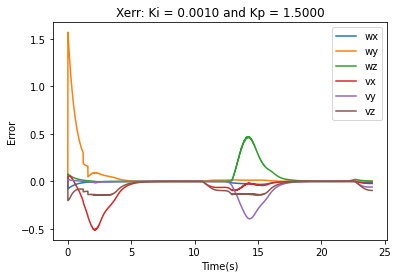

Complete


In [68]:
# Best
Kp = 1.5
Ki = 0.001
cubeHeight, grasp, standoff  = cubeParams()
cubeInit = np.array([
                    [1, 0, 0, 1],
                    [0, 1, 0, 0],
                    [0, 0, 1, cubeHeight/2],
                    [0, 0, 0, 1]
])
cubeFinal = np.array([
                    [0, 1, 0, 0],
                    [-1, 0, 0, -1],
                    [0, 0, 1, cubeHeight/2],
                    [0, 0, 0, 1]
])
Tse = np.array([
                    [0, 0, 1, 0],
                    [0, 1, 0, 0],
                    [-1, 0, 0, 0.5],
                    [0, 0, 0, 1]
])

youBot = np.array([-0.1, -0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
configMat, XError = youBotControls(cubeInit, cubeFinal, youBot, Tse, Kp, Ki)
# print('Saving Files')
# np.savetxt("CoppeliaSim_Best.csv", np.asarray(configMat), delimiter = ",") 
# np.savetxt("Xerr_Best.csv", np.asarray(XError), delimiter = ",") 

Trajectory Generated
Generating Controller Data
Plotting error data


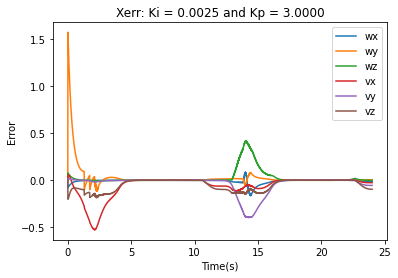

Complete


In [67]:
# Overshoot
Kp = 3
Ki = 0.0025
cubeHeight, grasp, standoff  = cubeParams()
cubeInit = np.array([
                    [1, 0, 0, 1],
                    [0, 1, 0, 0],
                    [0, 0, 1, cubeHeight/2],
                    [0, 0, 0, 1]
])
cubeFinal = np.array([
                    [0, 1, 0, 0],
                    [-1, 0, 0, -1],
                    [0, 0, 1, cubeHeight/2],
                    [0, 0, 0, 1]
])
Tse = np.array([
                    [0, 0, 1, 0],
                    [0, 1, 0, 0],
                    [-1, 0, 0, 0.5],
                    [0, 0, 0, 1]
])

youBot =  np.array([-0.1, -0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
configMat, XError = youBotControls(cubeInit, cubeFinal, youBot, Tse, Kp, Ki)
# print('Saving Files')
# np.savetxt("CoppeliaSim_Overshoot.csv", np.asarray(configMat), delimiter = ",") 
# np.savetxt("Xerr_Overshoot.csv", np.asarray(XError), delimiter = ",") 

Trajectory Generated
Generating Controller Data
Plotting error data


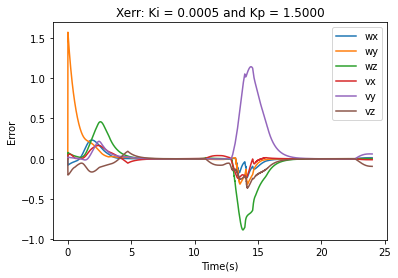

Complete


In [2]:
# New Task
Kp = 1.5
Ki = 0.0005
cubeHeight, grasp, standoff  = cubeParams()
# (-1m, -1m, pi/2 rad)
cubeInit = np.array([
                    [0, -1, 0, -1],
                    [1, 0, 0, -1],
                    [0, 0, 1, cubeHeight/2],
                    [0, 0, 0, 1]
])
# (0m, 1.5m, 0 rad)
cubeFinal = np.array([
                    [1, 0, 0, 0],
                    [0, 1, 0, 1.5],
                    [0, 0, 1, cubeHeight/2],
                    [0, 0, 0, 1]
])
Tse = np.array([
                    [0, 0, 1, 0],
                    [0, 1, 0, 0],
                    [-1, 0, 0, 0.5],
                    [0, 0, 0, 1]
])

youBot = np.array([-0.1, -0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
configMat, XError = youBotControls(cubeInit, cubeFinal, youBot, Tse, Kp, Ki)
# print('Saving Files')
# np.savetxt("CoppeliaSim_newTask.csv", np.asarray(configMat), delimiter = ",") 
# np.savetxt("Xerr_newTask.csv", np.asarray(XError), delimiter = ",") 